# 2- Gage RnR Examples

## 2.1- RnR Gage analysis (no tolerance, no report tittle)

### 2.1.1- Introduction

This first example will be based on Ted Hessing article. It could be used 
to check the result of this calculations:
https://sixsigmastudyguide.com/repeatability-and-reproducibility-rr/

### 2.1.2- STEP 1: Get the measurement

In [1]:
from pypetb import RnR
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#set seaborn style to improve the figure sight
sns.set()

# Load measurement dataset
url = 'https://raw.githubusercontent.com/jgherruzo/myFreeDatasets/main/web.csv' # noqa
df=pd.read_csv(url,sep=';')
print(df.info()) # In order to check column names 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Technician  90 non-null     object 
 1   Parts       90 non-null     int64  
 2   Valor       90 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ KB
None


### 2.1.3- STEP 2: Make all calculation calling .RnRSolve()

In [2]:
#Build up the model
dict_key={'1':'Technician','2':'Parts','3':'Valor'}
RnRModel=RnR.RnRNumeric(
    mydf_Raw=df,
    mydict_key=dict_key
    )
#Solve it
RnRModel.RnRSolve()
#Check the calculation
print(RnRModel.getLog())

Model is created
== DATASET EVALUATION ==
Operator: 3
Trials: 3
Piezes: 10
== CALCULATION ==
Total data: 90
Max. measured value: 5.8900
Min. measured value: 1.7200
Avg. measured value: 3.0660
Avg. Control limits
UCL: 3.4575
LCL: 2.6745
Avg. Range measured: 0.3827
Range Control limits
UCL: 0.9850
LCL: 0.0000
Sum of deviation by operator: 0.003331
Total Operator Sum of deviation: 0.099927
Sum of deviation by part: 12.947714
Total Part Sum of deviation: 116.529427
Total squared deviation: 120.681960
Equipment squared deviation: 3.605800
Iteration sum of squared: 0.446807



### 2.1.4- STEP 3: Check Anova Result

Anova calculation is implemented into other python package. The only different
here is that result is obtained as pandas dataframe and each parameter could
be accesed using its column and index for further calculations

In [3]:
df_Result=RnRModel.RnRAnova()
#Checking Anova table
print(df_Result)
#accesing one individual value
print(f"Degree of freedom for part: {df_Result['DF'].loc['Part']}")

                       DF          SS         MS           F             P
Source of variability                                                     
Technician              2    0.099927   0.049963    2.012817  1.625911e-01
Part                    9  116.529427  12.947714  521.610063  1.110223e-16
TechxPart (iteration)  18    0.446807   0.024823    0.413044  9.799258e-01
Repeatability with     60    3.605800   0.060097         NaN           NaN
Repeatability without  78    4.052607   0.051956         NaN  9.799258e-01
Total                  89  120.681960        NaN         NaN           NaN
Degree of freedom for part: 9


### 2.1.5- STEP 4: Variance table

Table that summarize the impact of each parameter to the variance.
It helps a lot to find where the effort must be focused

In [4]:
df_Result=RnRModel.RnR_varTable()
#Checking var. table
print(df_Result)
#accesing one individual value
print('\nRnR RESULT:\n-------------------')

dbl_RnR=df_Result['% Contribution'].loc['Total Gage R&R']
print(f"Total Gage R&R: {dbl_RnR:.3f}")
if dbl_RnR<1:
    print('<1% --> Acceptable measurement system')
elif dbl_RnR>=1 and dbl_RnR<=9:
    print(
        '1-9%--> It may be acceptable depending on application and cost'
        )
else:
    print(
        '>9% --> Unacceptable measurement system, it must be improved'
        )

                           Variance  % Contribution
Source                                             
Total Gage R&R             0.051956        3.499182
Eq.Var. (Repeatability)    0.051956        3.499182
Op.Var. (Reproducibility)  0.000000        0.000000
Technician                 0.000000        0.000000
Technician x Part iter.    0.000000        0.000000
Part to Part               1.432862       96.500818
Total variation            1.484818      100.000000

RnR RESULT:
-------------------
Total Gage R&R: 3.499
1-9%--> It may be acceptable depending on application and cost


### 2.1.6- STEP 5: Standard Deviation table

Table that summarize the impact of each parameter to the standard deviation.
It helps a lot to find where the effort must be focused

In [5]:
df_Result=RnRModel.RnR_SDTable()
#Checking sd table
print(df_Result)
#accesing one individual value
print('\nAutomotive Industry Action Group (AIAG) measurement system assessment:\n-------------------')

dbl_RnR=df_Result['% Study Var'].loc['Total Gage R&R']
print(f"Total Gage R&R: {dbl_RnR:.3f}")
if dbl_RnR<10:
    print('<10% --> Acceptable measurement system')
elif dbl_RnR>=10 and dbl_RnR<=30:
    print(
        '10-30%--> It may be acceptable depending on application and cost'
        )
else:
    print(
        '>30% --> Unacceptable measurement system, it must be improved'
        )

                           StdDev (SD)  StudyVar (6*SD)  % Study Var
Source                                                              
Total Gage R&R                0.227940         1.367638     18.70610
Eq.Var. (Repeatability)       0.227940         1.367638     18.70610
Op.Var. (Reproducibility)     0.000000         0.000000      0.00000
Technician                    0.000000         0.000000      0.00000
Technician x Part iter.       0.000000         0.000000      0.00000
Part to Part                  1.197022         7.182133     98.23483
Total variation               1.218531         7.311188    100.00000

Automotive Industry Action Group (AIAG) measurement system assessment:
-------------------
Total Gage R&R: 18.706
10-30%--> It may be acceptable depending on application and cost


### 2.1.7- STEP 6: Check the run chart

This chart summaryze all the measurement by part and operator, so in case of big difference, it makes easier find what could be the source

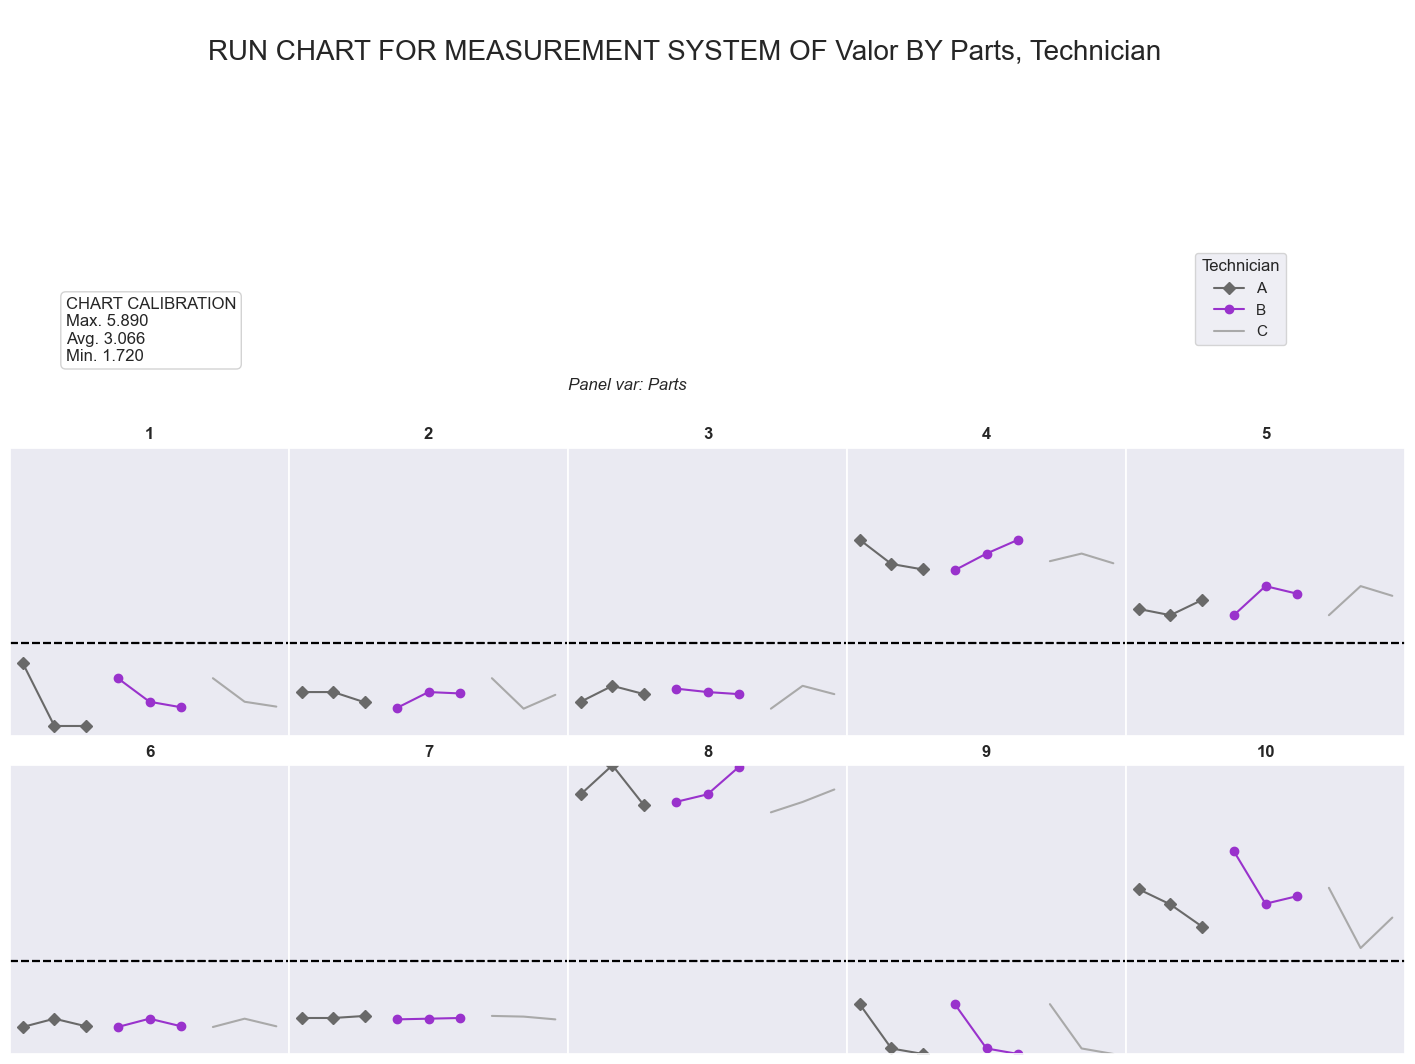

In [6]:
call=RnRModel.RnR_RunChart()
plt.show()

### 2.1.8- STEP 8: Check the final report

This figure is a mix of chart that will help to find where to be focused in case of being out the recommended limits. The report througth some advisement based on AIAG assesment standard and the number of categories showed by the system

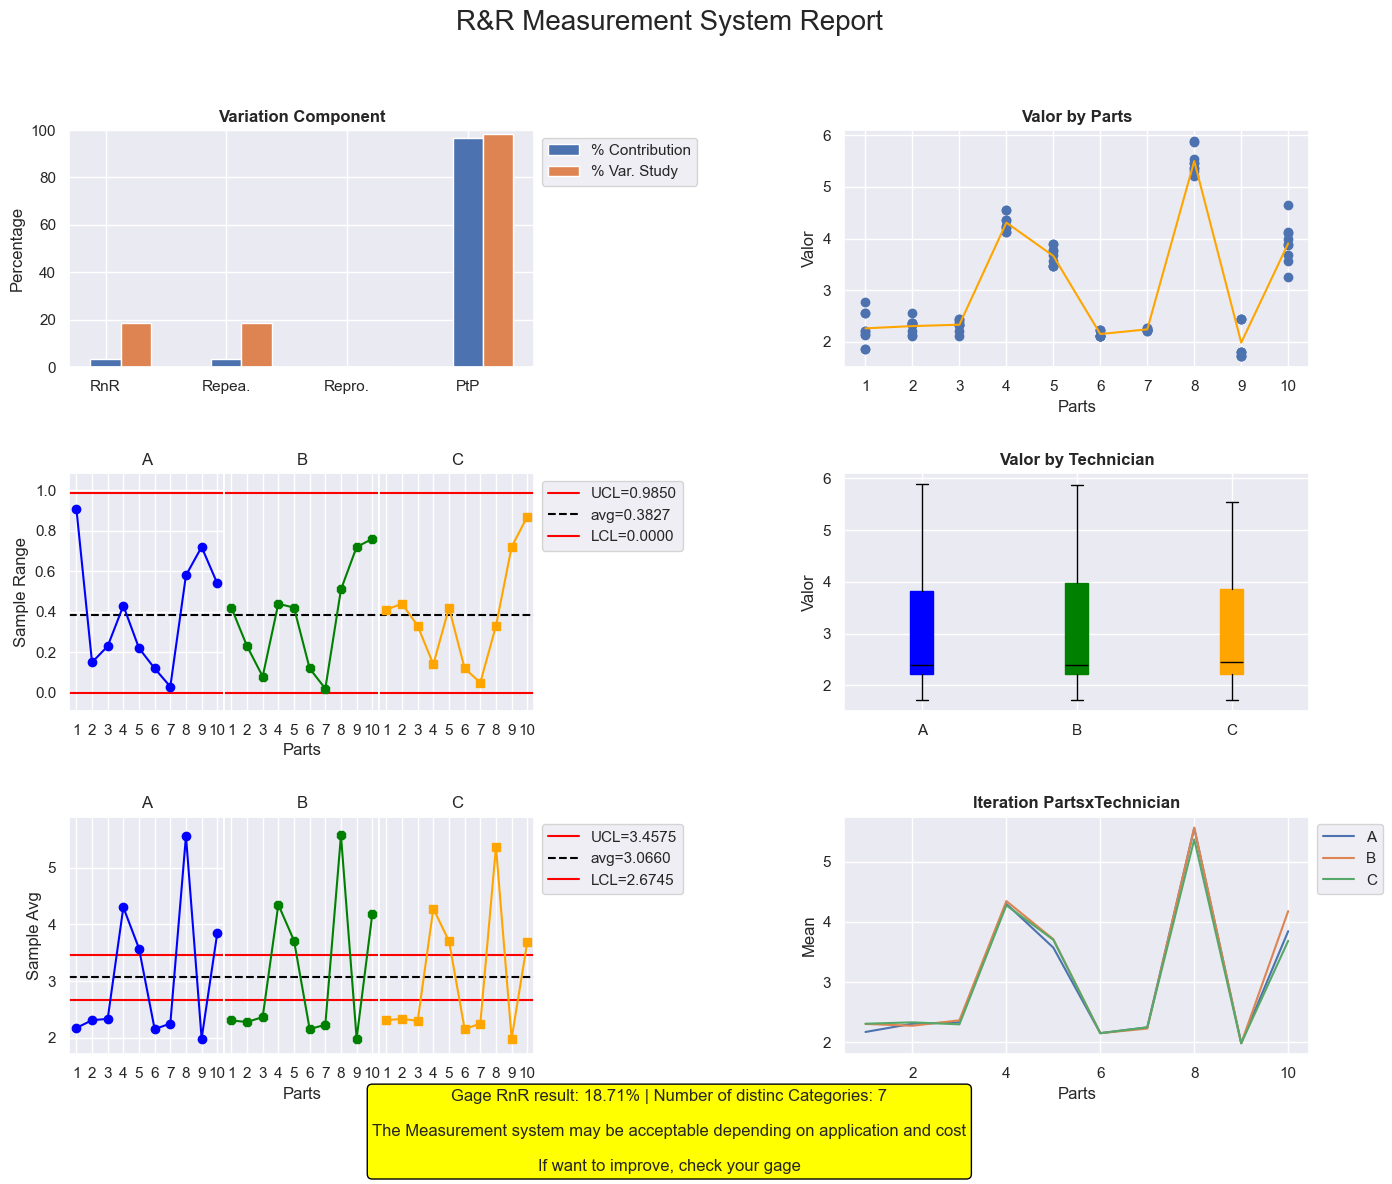

In [7]:
call=RnRModel.RnR_Report()
plt.show()

## 2.2- RnR Gage analysis (using tolerance, adding a report tittle)

### 2.2.1- Introduction

Second example is commonly used during Minitab tutorial:
https://youtu.be/JbvXY7PeKxU?si=ZDlJerdh_SJM_vy6

### 2.2.2- STEP 1: Get the measurement

In [8]:
# Load measurement dataset
url = 'https://raw.githubusercontent.com/jgherruzo/myFreeDatasets/main/RnR_Example.csv' # noqa
df=pd.read_csv(url,sep=';')
print(df.info()) # In order to check column names 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Part         90 non-null     int64  
 1   Operator     90 non-null     object 
 2   Measurement  90 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ KB
None


### 2.2.3- STEP 2: Make all calculation calling .RnRSolve()

In [9]:
#Build up the model
dict_key={
        '1':'Operator',
        '2':'Part',
        '3':'Measurement'
        }
RnRModel=RnR.RnRNumeric(
    mydf_Raw=df,
    mydict_key=dict_key,
    mydbl_tol=8
    )
#Solve it
RnRModel.RnRSolve()
#Check the calculation
print(RnRModel.getLog())

Model is created
== DATASET EVALUATION ==
Operator: 3
Trials: 3
Piezes: 10
== CALCULATION ==
Total data: 90
Max. measured value: 2.2600
Min. measured value: -2.1600
Avg. measured value: 0.0014
Avg. Control limits
UCL: 0.3510
LCL: -0.3481
Avg. Range measured: 0.3417
Range Control limits
UCL: 0.8794
LCL: 0.0000
Sum of deviation by operator: 0.105575
Total Operator Sum of deviation: 3.167262
Sum of deviation by part: 9.817993
Total Part Sum of deviation: 88.361934
Total squared deviation: 94.647112
Equipment squared deviation: 2.758933
Iteration sum of squared: 0.358982



### 2.2.4- STEP 3: Check Anova Result

Anova calculation is implemented into other python package. The only different
here is that result is obtained as pandas dataframe and each parameter could
be accesed using its column and index for further calculations

In [10]:
df_Result=RnRModel.RnRAnova()
#Checking Anova table
print(df_Result)
#accesing one individual value
print(f"Degree of freedom for part: {df_Result['DF'].loc['Part']}")

                       DF         SS        MS           F             P
Source of variability                                                   
Technician              2   3.167262  1.583631   79.406049  1.174478e-09
Part                    9  88.361934  9.817993  492.291423  1.110223e-16
TechxPart (iteration)  18   0.358982  0.019943    0.433721  9.741064e-01
Repeatability with     60   2.758933  0.045982         NaN           NaN
Repeatability without  78   3.117916  0.039973         NaN  9.741064e-01
Total                  89  94.647112       NaN         NaN           NaN
Degree of freedom for part: 9


### 2.2.5- STEP 4: Variance table

Table that summarize the impact of each parameter to the variance.
It helps a lot to find where the effort must be focused

In [11]:
df_Result=RnRModel.RnR_varTable()
#Checking var. table
print(df_Result)
#accesing one individual value
print('\nRnR RESULT:\n-------------------')

dbl_RnR=df_Result['% Contribution'].loc['Total Gage R&R']
print(f"Total Gage R&R: {dbl_RnR:.3f}")
if dbl_RnR<1:
    print('<1% --> Acceptable measurement system')
elif dbl_RnR>=1 and dbl_RnR<=9:
    print(
        '1-9%--> It may be acceptable depending on application and cost'
        )
else:
    print(
        '>9% --> Unacceptable measurement system, it must be improved'
        )

                           Variance  % Contribution
Source                                             
Total Gage R&R             0.091429        7.762159
Eq.Var. (Repeatability)    0.039973        3.393677
Op.Var. (Reproducibility)  0.051455        4.368482
Technician                 0.051455        4.368482
Technician x Part iter.    0.000000        0.000000
Part to Part               1.086447       92.237841
Total variation            1.177875      100.000000

RnR RESULT:
-------------------
Total Gage R&R: 7.762
1-9%--> It may be acceptable depending on application and cost


### 2.2.6- STEP 5: Standard Deviation table

Table that summarize the impact of each parameter to the standard deviation.
It helps a lot to find where the effort must be focused

In [12]:
df_Result=RnRModel.RnR_SDTable()
#Checking sd table
print(df_Result)
#accesing one individual value
print('\nAutomotive Industry Action Group (AIAG) measurement system assessment:\n-------------------')

dbl_RnR=df_Result['% Study Var'].loc['Total Gage R&R']
print(f"Total Gage R&R: {dbl_RnR:.3f}")
if dbl_RnR<10:
    print('<10% --> Acceptable measurement system')
elif dbl_RnR>=10 and dbl_RnR<=30:
    print(
        '10-30%--> It may be acceptable depending on application and cost'
        )
else:
    print(
        '>30% --> Unacceptable measurement system, it must be improved'
        )

                           StdDev (SD)  StudyVar (6*SD)  % Study Var  \
Source                                                                 
Total Gage R&R                0.302372         1.814229    27.860651   
Eq.Var. (Repeatability)       0.199933         1.199599    18.421935   
Op.Var. (Reproducibility)     0.226838         1.361025    20.900913   
Technician                    0.226838         1.361025    20.900913   
Technician x Part iter.       0.000000         0.000000     0.000000   
Part to Part                  1.042327         6.253965    96.040534   
Total variation               1.085300         6.511797   100.000000   

                           % tol (VE/tol)  
Source                                     
Total Gage R&R                  22.677864  
Eq.Var. (Repeatability)         14.994988  
Op.Var. (Reproducibility)       17.012814  
Technician                      17.012814  
Technician x Part iter.          0.000000  
Part to Part                    78.174562  

### 2.2.7- STEP 6: Check the run chart

This chart summaryze all the measurement by part and operator, so in case of big difference, it makes easier find what could be the source

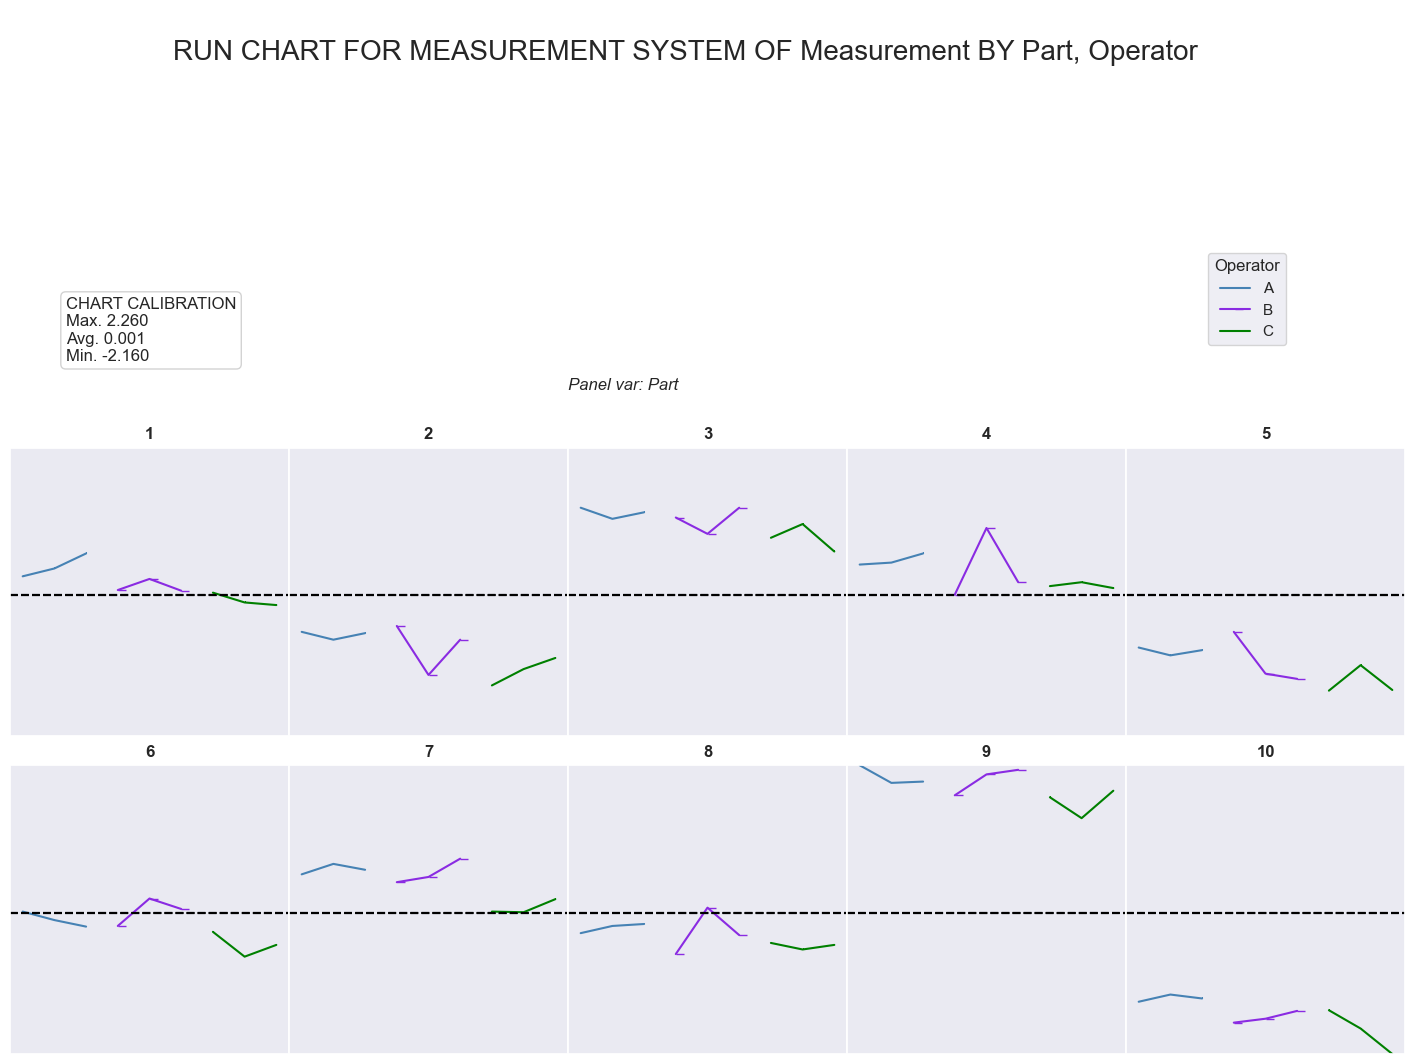

In [13]:
call=RnRModel.RnR_RunChart()
plt.show()

### 2.2.8- STEP 8: Check the final report

This figure is a mix of chart that will help to find where to be focused in case of being out the recommended limits. The report througth some advisement based on AIAG assesment standard and the number of categories showed by the system

In [ ]:
call=RnRModel.RnR_Report("my Report Tittle")
plt.show()